In [6]:
#Objective: Compare the total weekly rainfall between London and Seattle over a full year.
#Tasks:
#Fetch Data: Retrieve hourly precipitation data for London and Seattle for the year 2022.
#London Coordinates: Latitude 51.5074, Longitude -0.1278
#Seattle Coordinates: Latitude 47.6062, Longitude -122.3321
#Data Cleaning: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
#Resample Data: Resample the hourly data to weekly totals.

#Visualization: Plot the weekly total precipitation for both cities on the same graph.
#Analysis: Determine which city had more rainfall overall and identify any interesting patterns.
#It appears that Seattle receives significantly more rainfall. 
#Note: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.# Importing libraries

London: Success!
Seattle: Success!


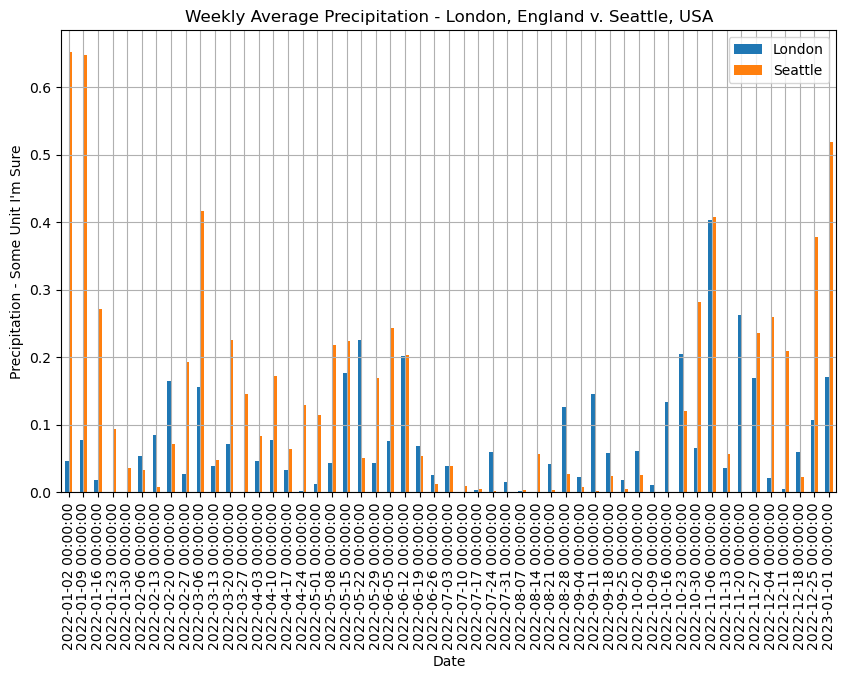

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Configure inline display for jupyter
%matplotlib inline

# Define city variables
latitude_london = 51.5074
longitude_london = -0.1278

latitude_seattle = 47.6062
longitude_seattle = -122.3321

# Define date range: 2022
start_date = '2022-01-01'
end_date = '2022-12-31'

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']

# API request parameters for London, Seattle

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_london = {
    'latitude': latitude_london,
    'longitude': longitude_london,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'auto'
}

response_london = requests.get(base_url, params=params_london)

params_seattle = {
    'latitude': latitude_seattle,
    'longitude': longitude_seattle,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'auto'
}

response_seattle = requests.get(base_url, params=params_seattle)

# Check success

if response_london.status_code == 200:
    print('London: Success!')
else:
    print('London: Failure!')

if response_seattle.status_code == 200:
    print('Seattle: Success!')
else:
    print('Seattle: Failure!')
    
    
    # Load London data into a dataframe

data_london = response_london.json()
hourly_data_london = data_london['hourly']
df_london = pd.DataFrame(hourly_data_london)

# Clean London dataframe of NaN's, filling with ffill
df_london['time'] = pd.to_datetime(df_london['time'])
df_london.set_index('time', inplace = True)
df_london.fillna(method = 'ffill', inplace = True)

# Load Seattle data into a dataframe
data_seattle = response_seattle.json()
hourly_data_seattle = data_seattle['hourly']
df_seattle = pd.DataFrame(hourly_data_seattle)

# Clean Seattle dataframe of NaN's, filling with ffill
df_seattle['time'] = pd.to_datetime(df_seattle['time'])
df_seattle.set_index('time', inplace = True)
df_seattle.fillna(method = 'ffill', inplace = True)

# Resample London data into weekly total
df_w_london = df_london.resample('W').mean()

# Resample Seattle data into weekly total
df_w_seattle = df_seattle.resample('W').mean()

#Combine dataframes for comparison; ASK GURDEEP ABT THIS.
combined_precip = pd.DataFrame({
    'London': df_w_london['precipitation'],
    'Seattle': df_w_seattle['precipitation']
})

#Visualize dataframes
combined_precip.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Average Precipitation - London, England v. Seattle, USA')
plt.xlabel('Date')
plt.ylabel('Precipitation - Some Unit I\'m Sure')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
    
#QUESTIONS:
#Advantage of ffill over bfill in this situation?

#Analysis: Seattle receives more rainfall. None of this is interesting to me.

In [3]:
#print(type(df_seattle))


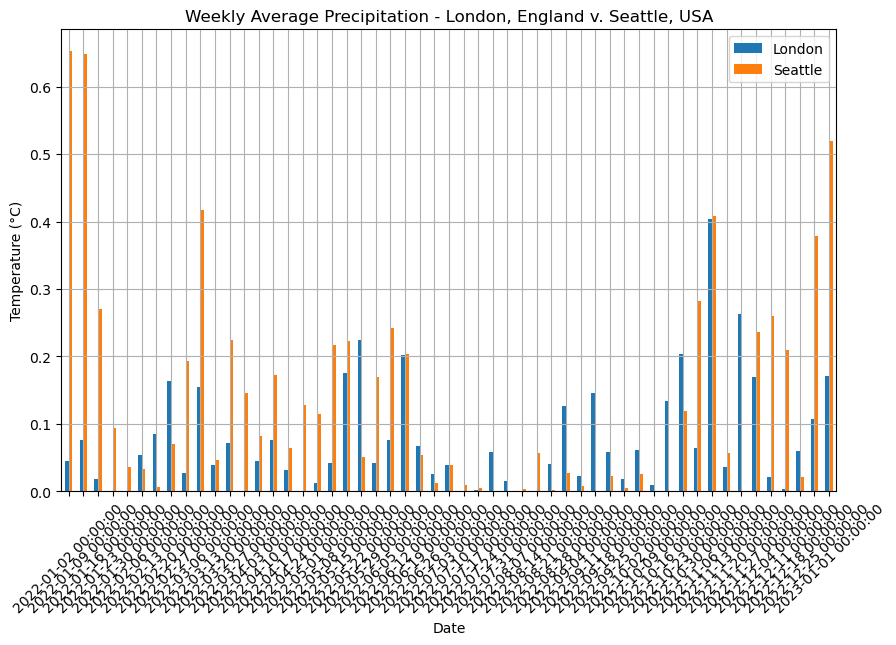

In [4]:

    
# Load London data into a dataframe

data_london = response_london.json()
hourly_data_london = data_london['hourly']
df_london = pd.DataFrame(hourly_data_london)

# Clean London dataframe of NaN's, filling with ffill
df_london['time'] = pd.to_datetime(df_london['time'])
df_london.set_index('time', inplace = True)
df_london.fillna(method = 'ffill', inplace = True)

# Load Seattle data into a dataframe
data_seattle = response_seattle.json()
hourly_data_seattle = data_seattle['hourly']
df_seattle = pd.DataFrame(hourly_data_seattle)

# Clean Seattle dataframe of NaN's, filling with ffill
df_seattle['time'] = pd.to_datetime(df_seattle['time'])
df_seattle.set_index('time', inplace = True)
df_seattle.fillna(method = 'ffill', inplace = True)

# Resample London data into weekly total
df_w_london = df_london.resample('W').mean()

# Resample Seattle data into weekly total
df_w_seattle = df_seattle.resample('W').mean()

#Combine dataframes for comparison; ASK GURDEEP ABT THIS.
combined_precip = pd.DataFrame({
    'London': df_w_london['precipitation'],
    'Seattle': df_w_seattle['precipitation']
})

#Visualize dataframes
combined_precip.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Average Precipitation - London, England v. Seattle, USA')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [5]:
print('London data retrieval: FAIL')
print('Seattle data retrival: FAIL')

London data retrieval: FAIL
Seattle data retrival: FAIL
